**1- Importing data y libraries**

---



In [ ]:
import pandas as pd
import io

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
print(train)

        UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE DISBURSAL_DATE  STATE_ID  EMPLOYEE_CODE_ID  MOBILENO_AVL_FLAG  AADHAR_FLAG  PAN_FLAG  VOTERID_FLAG  DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE PERFORM_CNS_SCORE_DESCRIPTION  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS AVERAGE_ACCT_AGE CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT
0         420825             50578       58400  89.55         67        22807               45                1441    01-01-1984        Salaried     03-08-2018         6              1998                  1            1         0             0             0        

In [ ]:
# Importing Libraries

import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from plotly import tools
import plotly.offline as py
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots



from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import itertools
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
import warnings

In [ ]:
#Shape of dataframe
print(" Shape of training dataframe: ", train.shape)

 Shape of training dataframe:  (233154, 41)


In [ ]:
# Drop duplicates
train.drop_duplicates()
print(train.shape)

(233154, 41)


**2- Variable Inspection**

In [ ]:
print("Names of columns ", list(train.columns))

Names of columns  ['UNIQUEID', 'DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT']


In [ ]:
#Null values in training dataset

null= train.isnull().sum().sort_values(ascending=False)
total =train.shape[0]
percent_missing= (train.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})

print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

In [ ]:
train_null_unique= train.EMPLOYMENT_TYPE .unique()
print(train_null_unique)

['Salaried' 'Self employed' nan]


In [ ]:
train.EMPLOYMENT_TYPE= train.EMPLOYMENT_TYPE.fillna("Missing")
train_null_unique= train.EMPLOYMENT_TYPE .unique()
print(train_null_unique)

['Salaried' 'Self employed' 'Missing']


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH are object, but they should be int.
DATE_OF_BIRTH & DISBURSAL_DATE should be datetime type

In [ ]:
# Changing AVERAGE_ACCT_AGE & CREDIT_HISTORY_LENGTH
train[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = train['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
train[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = train['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
train["AVERAGE_ACCT_AGE"]= train["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((train["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

train[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = train['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
train[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = train['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
train["CREDIT_HISTORY_LENGTH"]= train["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((train["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
train= train.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [ ]:
train['DATE_OF_BIRTH'] =  pd.to_datetime(train['DATE_OF_BIRTH'], format='%d-%m-%Y')
#format='%d%b%Y:%H:%M:%S.%f'
train['DISBURSAL_DATE'] =  pd.to_datetime(train['DISBURSAL_DATE'], format='%d-%m-%Y')

In [ ]:
print(" Shape of training dataframe: ", train.shape)

 Shape of training dataframe:  (233154, 41)


In [ ]:
#remove_n = 128000
#temp= train[train['LOAN_DEFAULT']==0]
#drop_indices = np.random.choice(temp.index, remove_n, replace=False)
#df_temp = temp.drop(drop_indices)
#temp2= train[train['LOAN_DEFAULT']==1]
#del train
#train= pd.concat ([df_temp, temp2])

**3- Exploratory data analysis**

3.1 Class distribution

In [ ]:
class_df = train.groupby('LOAN_DEFAULT').count()['UNIQUEID'].reset_index().sort_values(by='UNIQUEID',ascending=False)
class_df.style.background_gradient(cmap='winter')

,LOAN_DEFAULT,UNIQUEID
0,0,182543
1,1,50611


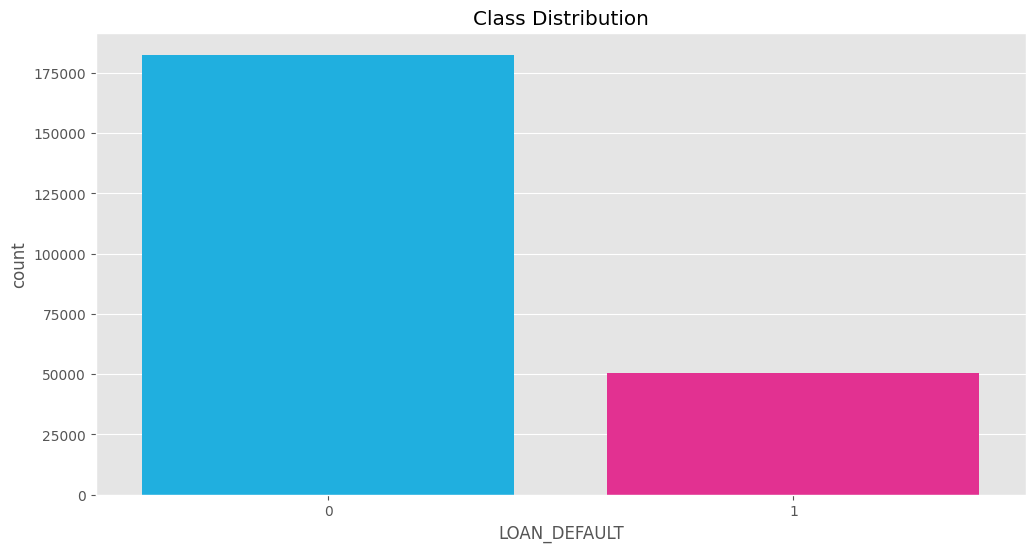

% of no defaults       : 78.29288796246257
Number of no defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [ ]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = train, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Normal_transacation = len(train[train['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(train[train['LOAN_DEFAULT']==1])
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

Flag : Uneven class

In [ ]:
print("Employment type\n")
print(train.groupby(["EMPLOYMENT_TYPE"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Mobile Flag\n")
print(train.groupby(["MOBILENO_AVL_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Aadhar Flag\n")
print(train.groupby(["AADHAR_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Pan Flag\n")
print(train.groupby(["PAN_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Voter ID Flag\n")
print(train.groupby(["VOTERID_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Driving L Flag\n")
print(train.groupby(["DRIVING_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))
print("##############\n")
print("Passport\n")
print(train.groupby(["PASSPORT_FLAG"]).LOAN_DEFAULT.value_counts(normalize=True))

Employment type

EMPLOYMENT_TYPE  LOAN_DEFAULT
Missing          0               0.785407
                 1               0.214593
Salaried         0               0.796542
                 1               0.203458
Self employed    0               0.772343
                 1               0.227657
Name: LOAN_DEFAULT, dtype: float64
##############

Mobile Flag

MOBILENO_AVL_FLAG  LOAN_DEFAULT
1                  0               0.782929
                   1               0.217071
Name: LOAN_DEFAULT, dtype: float64
##############

Aadhar Flag

AADHAR_FLAG  LOAN_DEFAULT
0            0               0.743594
             1               0.256406
1            0               0.790403
             1               0.209597
Name: LOAN_DEFAULT, dtype: float64
##############

Pan Flag

PAN_FLAG  LOAN_DEFAULT
0         0               0.783170
          1               0.216830
1         0               0.779978
          1               0.220022
Name: LOAN_DEFAULT, dtype: float64
##############



In [ ]:
print(train.groupby(["LOAN_DEFAULT","EMPLOYMENT_TYPE","AADHAR_FLAG","PAN_FLAG","DRIVING_FLAG","PASSPORT_FLAG"]).VOTERID_FLAG.value_counts(normalize=False))
print("##############\n")

LOAN_DEFAULT  EMPLOYMENT_TYPE  AADHAR_FLAG  PAN_FLAG  DRIVING_FLAG  PASSPORT_FLAG  VOTERID_FLAG
0             Missing          0            0         0             0              1                 451
                                                                    1              0                  10
                                                      1             0              0                  44
                                                                                   1                   4
                                            1         0             0              1                  16
                                                                                   0                   1
                                                      1             0              0                   1
                               1            0         0             0              0                5315
                                                                

In [ ]:
train_0 = train[train["LOAN_DEFAULT"]==0]
train_1 = train[train["LOAN_DEFAULT"]==1]

3.2 Default vs Disbursal date

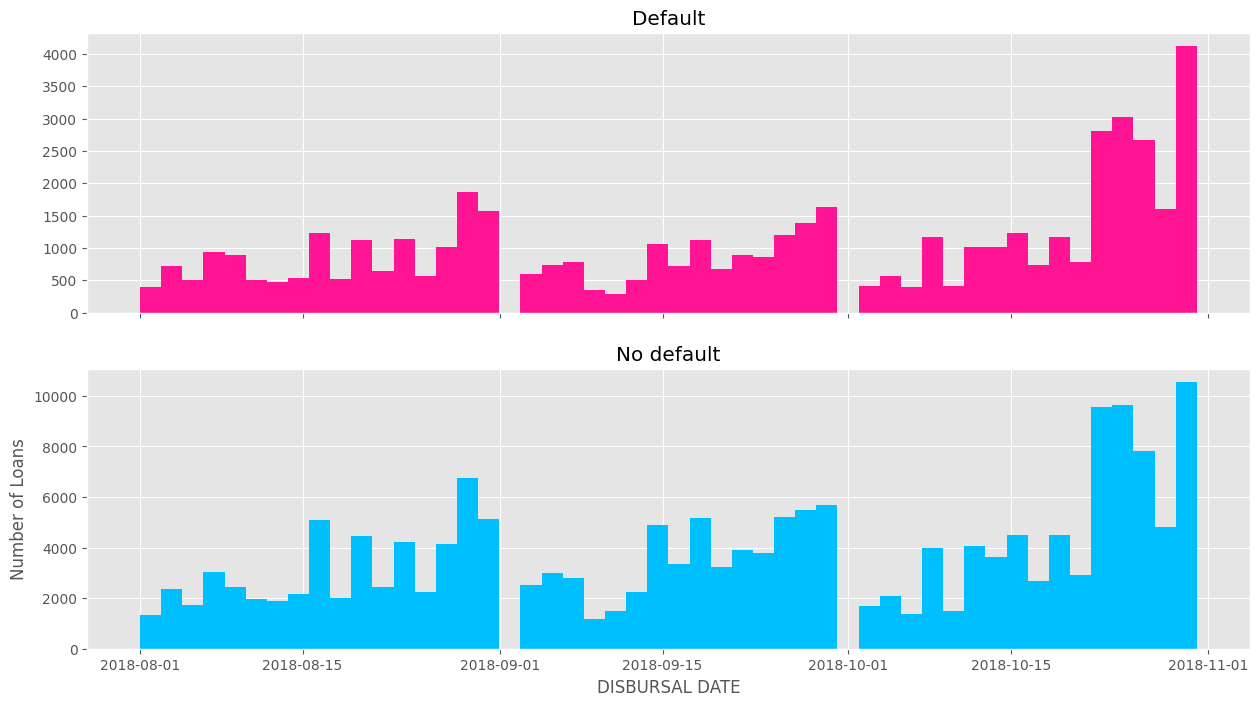

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

bins = 50

ax1.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 1], bins = bins, color = 'deeppink')
ax1.set_title('Default')

ax2.hist(train.DISBURSAL_DATE[train.LOAN_DEFAULT == 0], bins = bins, color = 'deepskyblue')
ax2.set_title('No default')

plt.xlabel('DISBURSAL DATE')
plt.ylabel('Number of Loans')
plt.show()


3.3 Univariate analysis

In [ ]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):

    i = 0
    t1 = train.loc[train['LOAN_DEFAULT'] != 0]
    t0 = train.loc[train['LOAN_DEFAULT'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="LOAN_DEFAULT = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="LOAN_DEFAULT = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
def plot_bar_comp(var,nrow=2):

    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.countplot(train[feature])
        sns.countplot(train[feature])
        plt.ylabel('Count plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();


In [ ]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(train[feature].dropna(),color=color)
    plt.show()

In [ ]:
# Bar Plot for one feature
def plot_bar(feature):
    plt.figure(figsize=(10,50))
    sns.catplot(y=feature, hue="LOAN_DEFAULT", kind="count",
            palette="pastel", edgecolor=".6",
            data=train);

Let's look into variables with high importance

Loan information

'DISBURSED_AMOUNT' : Amount of Loan disbursed

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


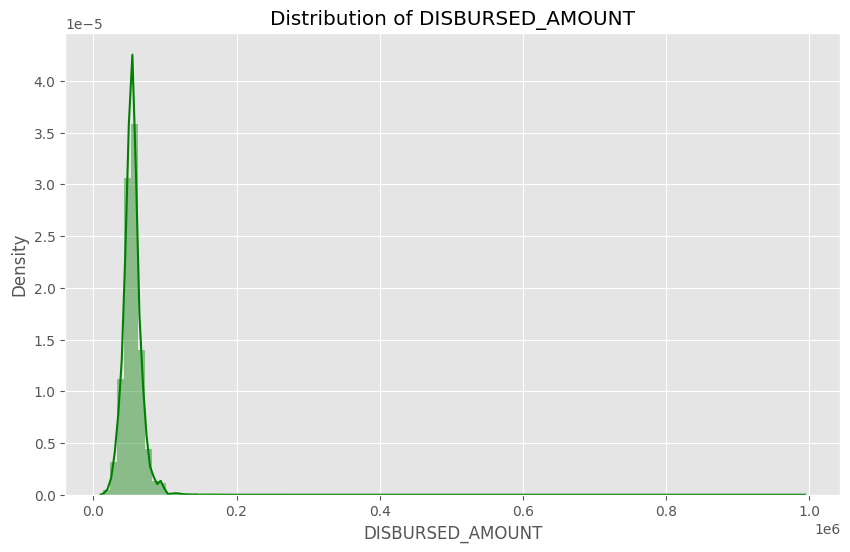

In [ ]:
print(train.DISBURSED_AMOUNT.describe())
plot_distribution('DISBURSED_AMOUNT','green')

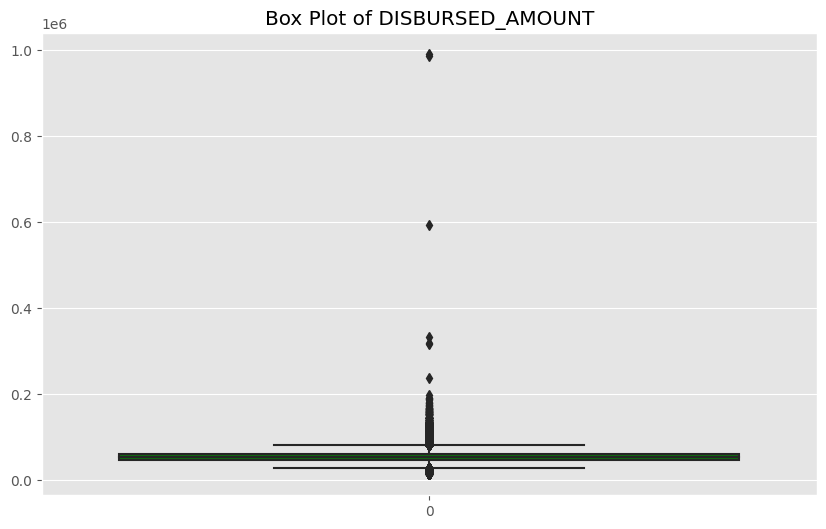

In [ ]:
plot_box("DISBURSED_AMOUNT", "green")

Since there are outliers - either we can treat outliers or do the binning
Here, we have the liberty of performing both and comparing their results

3.4 Outlier Treatment

In [ ]:
#Number of observations in column
obs = len(train.DISBURSED_AMOUNT)
print("No. of observations in column: ",obs)

# calculate summary statistics
data_mean, data_std = mean(train.DISBURSED_AMOUNT), std(train.DISBURSED_AMOUNT)
print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in train.DISBURSED_AMOUNT if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=12971.286
Identified outliers: 3076


In [ ]:
def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)
train["DISBURSED_AMOUNT_new"]= train["DISBURSED_AMOUNT"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))

No. of observations in column:  233154


Binning
mean 54356.993528

std 12971.314171

min 13320.000000

25% 47145.000000

50% 53803.000000

75% 60413.000000

max 990572.000000

In [ ]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['DISBURSED_AMOUNT_bins'] = pd.qcut(train['DISBURSED_AMOUNT'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['DISBURSED_AMOUNT_bins'].value_counts()

Medium     58676
Low        58537
Extreme    58207
High       57734
Name: DISBURSED_AMOUNT_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

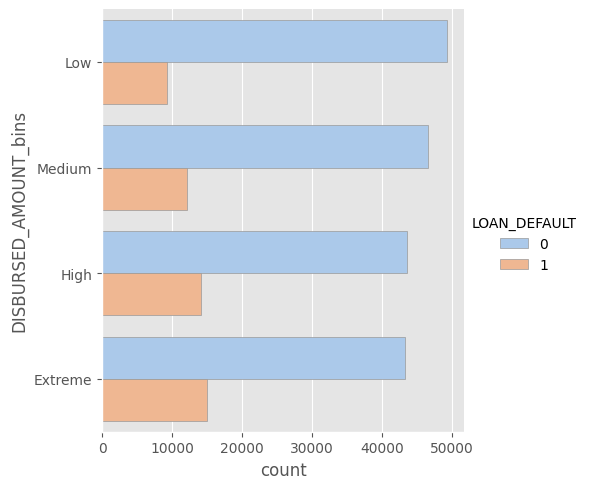

In [ ]:
plot_bar("DISBURSED_AMOUNT_bins")

'ASSET_COST' : Payment default in the first EMI on due date

count             233154.0
mean     75865.06814380195
std      18944.78128866533
min                37000.0
25%                65717.0
50%                70946.0
75%               79201.75
max              1628992.0
Name: ASSET_COST, dtype: object


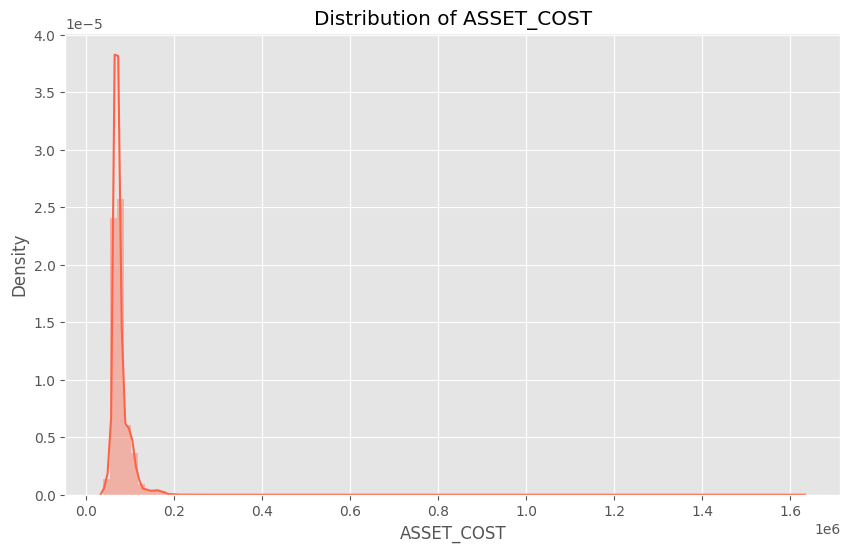

In [ ]:
print(train.ASSET_COST.describe().astype(str))
plot_distribution('ASSET_COST','tomato')

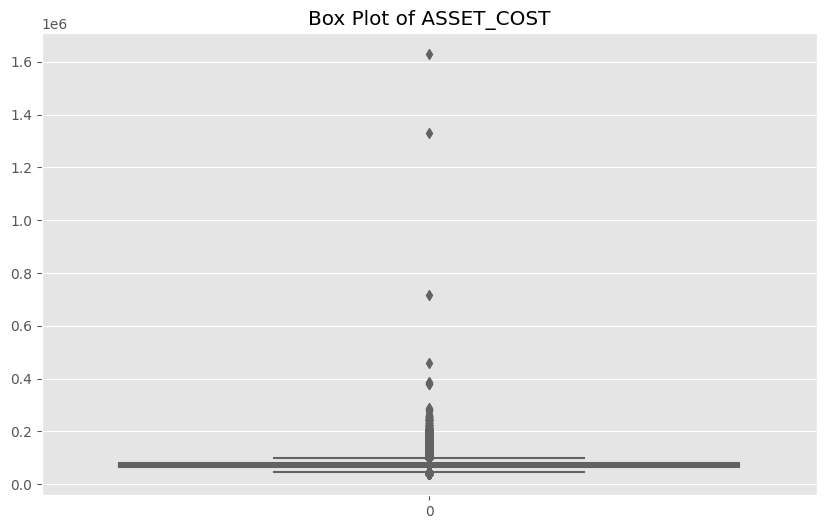

In [ ]:
plot_box("ASSET_COST", "tomato")

In [ ]:
#Number of observations in column
def outlier_data(df, feature):
    #Number of observations in column
    obs = len(df[feature])
    print("No. of observations in column: ",obs)

    # calculate summary statistics
    data_mean, data_std = mean(df[feature]), std(df[feature])
    print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))

def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

In [ ]:
outlier_data(train,"ASSET_COST")

No. of observations in column:  233154
Statistics: Mean=75865.068, Std dev=18944.741
Identified outliers: 4425


In [ ]:
train["ASSET_COST_new"]= train["ASSET_COST"].apply(impute_outlier)
print("No. of observations in column: ",len(train.DISBURSED_AMOUNT_new))
outlier_data(train,"ASSET_COST_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=68018.188, Std dev=9598.448
Identified outliers: 60


Binning

mean 75865.06814380195

std 18944.78128866517

min 37000.0

25% 65717.0

50% 70946.0

75% 79201.75

max 1628992.0

In [ ]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['ASSET_COST_bins'] = pd.qcut(train['ASSET_COST'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['ASSET_COST_bins'].value_counts()

Low        58290
Extreme    58289
Medium     58288
High       58287
Name: ASSET_COST_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

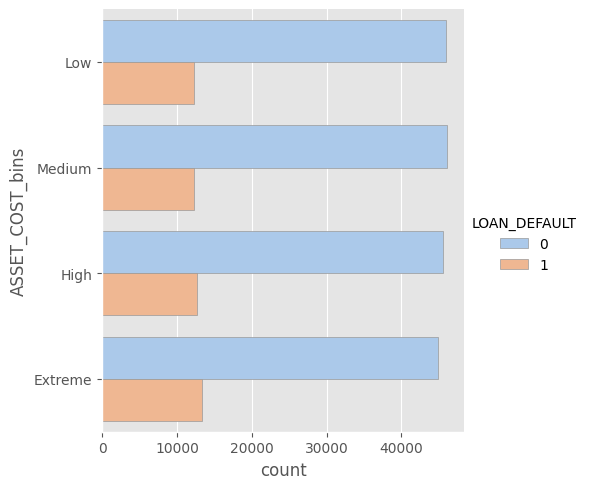

In [ ]:
plot_bar("ASSET_COST_bins")

LTV

count              233154.0
mean      74.74653001878589
std      11.456635738792569
min                   10.03
25%                   68.88
50%                    76.8
75%                   83.67
max                    95.0
Name: LTV, dtype: object


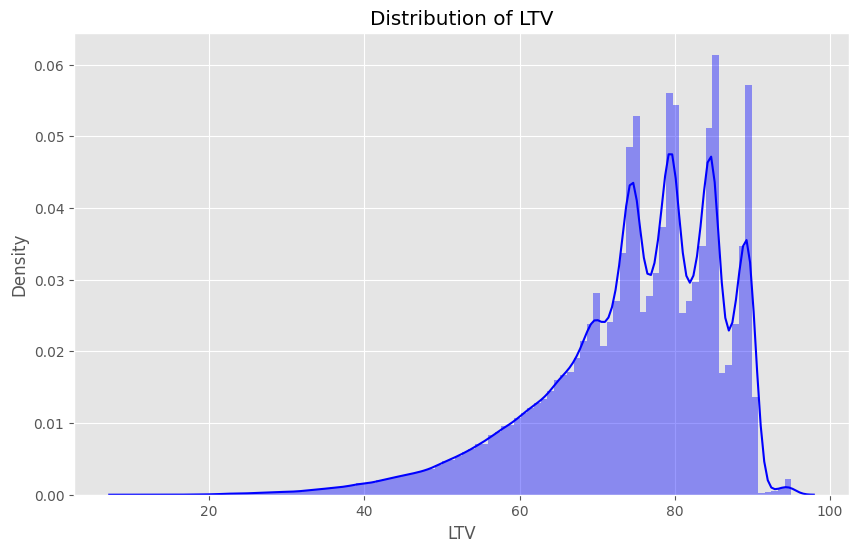

In [ ]:
print(train.LTV.describe().astype(str))
plot_distribution('LTV','blue')

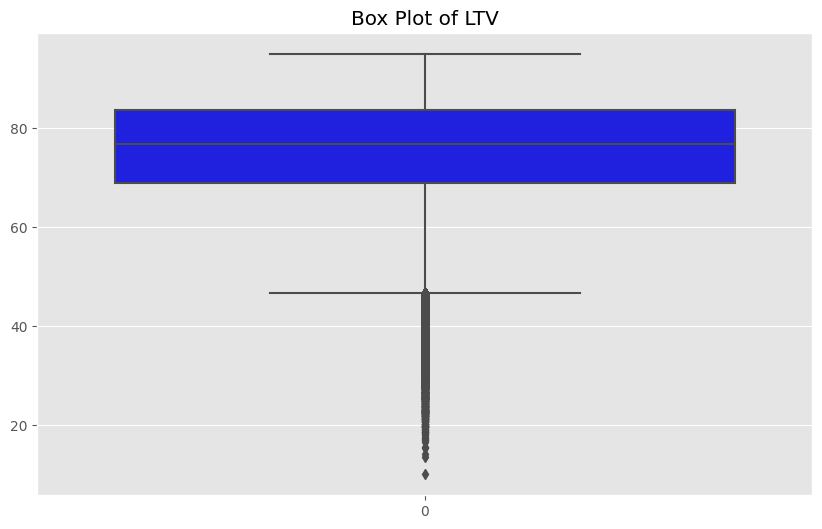

In [ ]:
plot_box("LTV", "blue")

In [ ]:
outlier_data(train,"LTV")

No. of observations in column:  233154
Statistics: Mean=74.747, Std dev=11.457
Identified outliers: 2745


In [ ]:
train["LTV_new"]= train["LTV"].apply(impute_outlier)
print("No. of observations in column: ",len(train.LTV_new))
outlier_data(train,"LTV_new")

No. of observations in column:  233154
No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


Binning

mean 74.74653001879038

std 11.456635738792304

min 10.03

25% 68.88

50% 76.8

75% 83.67

max 95.0

In [ ]:
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
train['LTV_bins'] = pd.qcut(train['LTV'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
train['LTV_bins'].value_counts()

Low        58303
Medium     58299
High       58285
Extreme    58267
Name: LTV_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

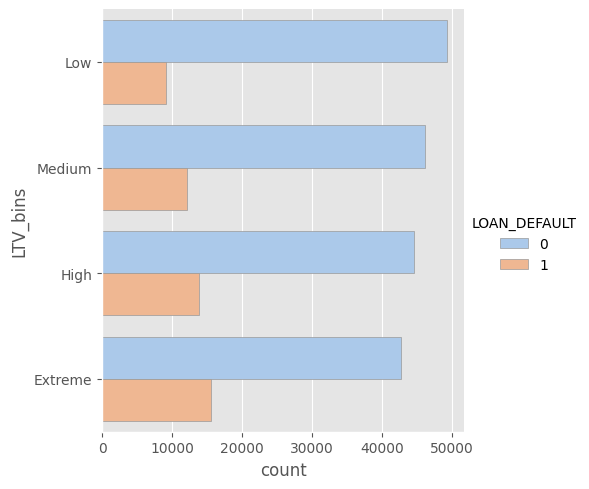

In [ ]:
plot_bar("LTV_bins")

'PERFORM_CNS_SCORE': Bureau Score

count              233154.0
mean     289.46299441570807
std      338.37477900845766
min                     0.0
25%                     0.0
50%                     0.0
75%                   678.0
max                   890.0
Name: PERFORM_CNS_SCORE, dtype: object


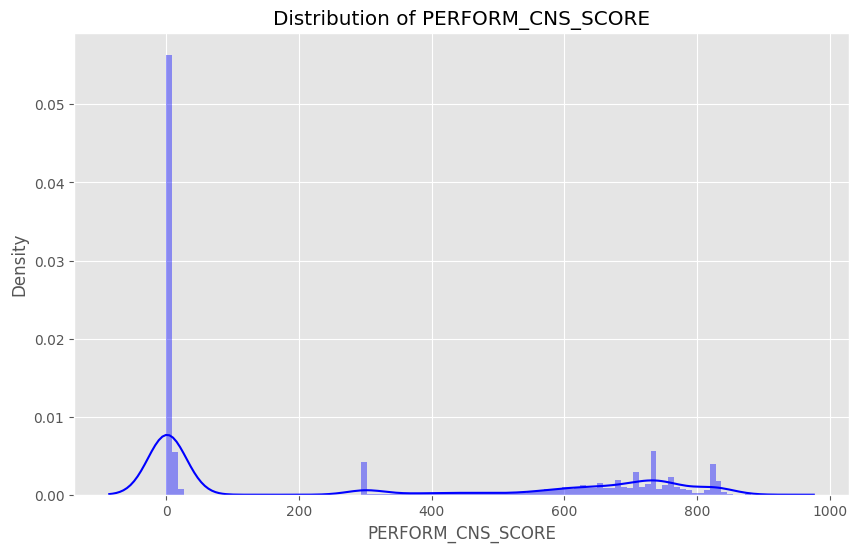

In [ ]:
print(train.PERFORM_CNS_SCORE.describe().astype(str))
plot_distribution('PERFORM_CNS_SCORE','blue')

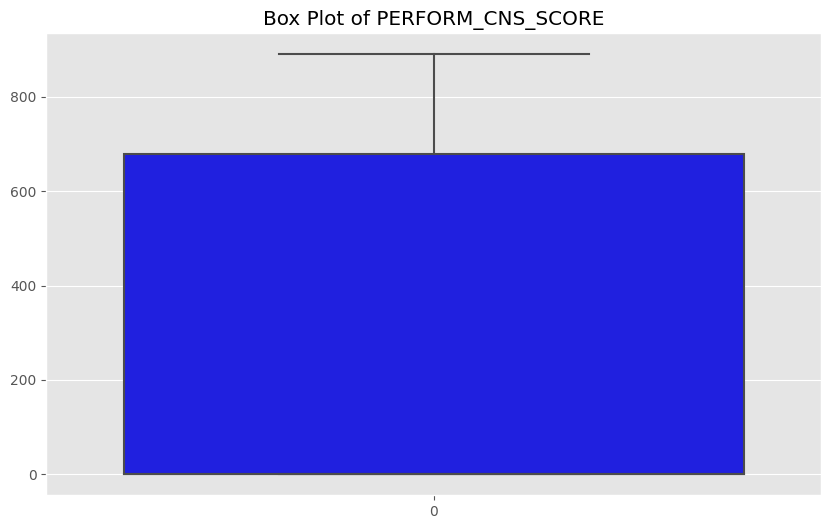

In [ ]:
plot_box("PERFORM_CNS_SCORE", "blue")

In [ ]:
outlier_data(train,"PERFORM_CNS_SCORE")

No. of observations in column:  233154
Statistics: Mean=289.463, Std dev=338.374
Identified outliers: 0


In [ ]:
bin_labels = ["No History",'Very Low', "Low" ,'Medium', 'High']
cut_bins = [-1,10,150, 350, 650, 1000]

train['PERFORM_CNS_SCORE_bins'] = pd.cut(train['PERFORM_CNS_SCORE'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PERFORM_CNS_SCORE_bins'].value_counts()

No History    116950
High           65034
Medium         28425
Very Low       12835
Low             9910
Name: PERFORM_CNS_SCORE_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

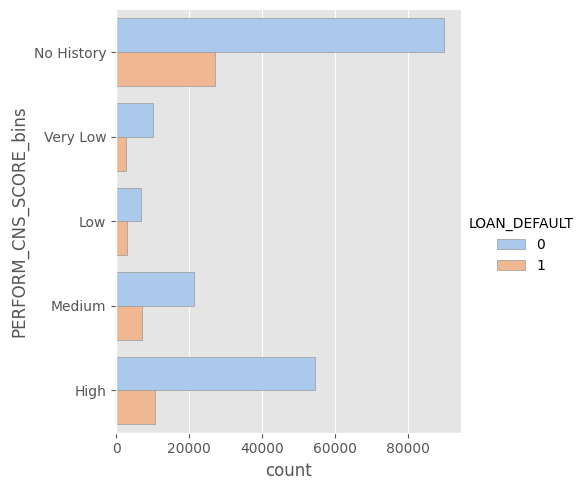

In [ ]:
plot_bar("PERFORM_CNS_SCORE_bins")

In [ ]:
train.groupby(["PERFORM_CNS_SCORE_DESCRIPTION"]).PERFORM_CNS_SCORE_bins.value_counts()

PERFORM_CNS_SCORE_DESCRIPTION                            PERFORM_CNS_SCORE_bins
A-Very Low Risk                                          High                       14124
                                                         No History                     0
                                                         Very Low                       0
                                                         Low                            0
                                                         Medium                         0
B-Very Low Risk                                          High                        9201
                                                         No History                     0
                                                         Very Low                       0
                                                         Low                            0
                                                         Medium                         0
C-Very Low Risk     

PERFORM_CNS_SCORE_DESCRIPTION

In [ ]:
train.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [ ]:
g = train.groupby("PERFORM_CNS_SCORE_DESCRIPTION")['LOAN_DEFAULT']
gg = pd.concat([g.value_counts(),
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (gg)

#train.groupby("PERFORM_CNS_SCORE_DESCRIPTION").LOAN_DEFAULT.value_counts(normalize=False)

                                                                 counts  percentage
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT                    
A-Very Low Risk                                    0              11783   83.425375
                                                   1               2341   16.574625
B-Very Low Risk                                    0               7993   86.870992
                                                   1               1208   13.129008
C-Very Low Risk                                    0              13275   82.736055
                                                   1               2770   17.263945
D-Very Low Risk                                    0               9659   85.041381
                                                   1               1699   14.958619
E-Low Risk                                         0               4821   82.820821
                                                   1               1000   17

PRI_NO_OF_ACCTS : count of total loans taken by the customer at the time of disbursement

count              233154.0
mean     2.4406358029456925
std      5.2172330215741844
min                     0.0
25%                     0.0
50%                     0.0
75%                     3.0
max                   453.0
Name: PRI_NO_OF_ACCTS, dtype: object


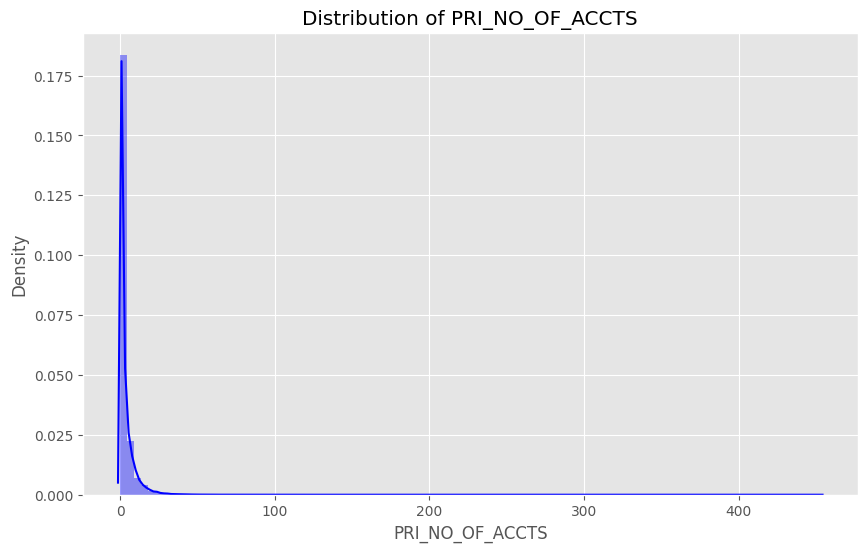

In [ ]:
print(train.PRI_NO_OF_ACCTS .describe().astype(str))
plot_distribution('PRI_NO_OF_ACCTS','blue')

count              233154.0
mean     2.4406358029456925
std      5.2172330215741844
min                     0.0
25%                     0.0
50%                     0.0
75%                     3.0
max                   453.0
Name: PRI_NO_OF_ACCTS, dtype: object


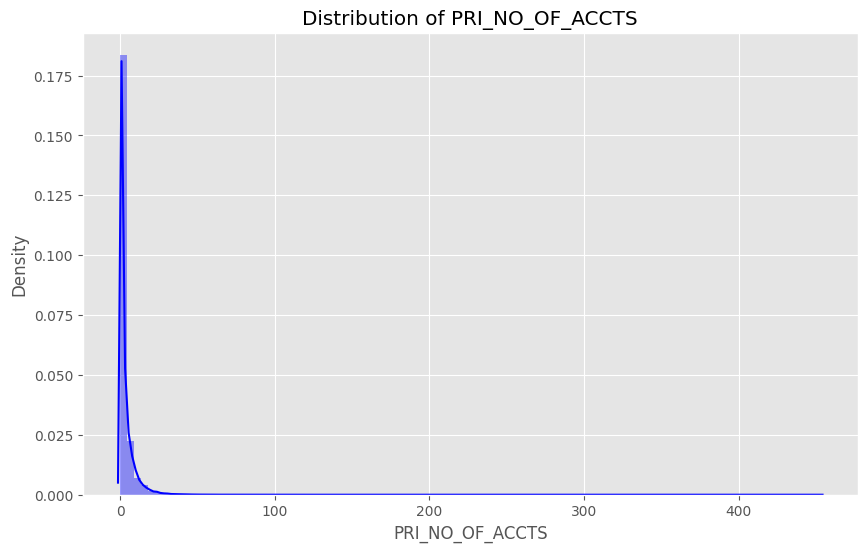

In [ ]:
print(train.PRI_NO_OF_ACCTS .describe().astype(str))
plot_distribution('PRI_NO_OF_ACCTS','blue')

In [ ]:
outlier_data(train,"PRI_NO_OF_ACCTS")

No. of observations in column:  233154
Statistics: Mean=2.441, Std dev=5.217
Identified outliers: 4119


In [ ]:
train["PRI_NO_OF_ACCTS_new"]= train["PRI_NO_OF_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_NO_OF_ACCTS_new")

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [ ]:
bin_labels = ["One",'More than One']
cut_bins = [-1,1, 1000]

train['PRI_NO_OF_ACCTS_bins'] = pd.cut(train['PRI_NO_OF_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_NO_OF_ACCTS_bins'].value_counts()

One              151928
More than One     81226
Name: PRI_NO_OF_ACCTS_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

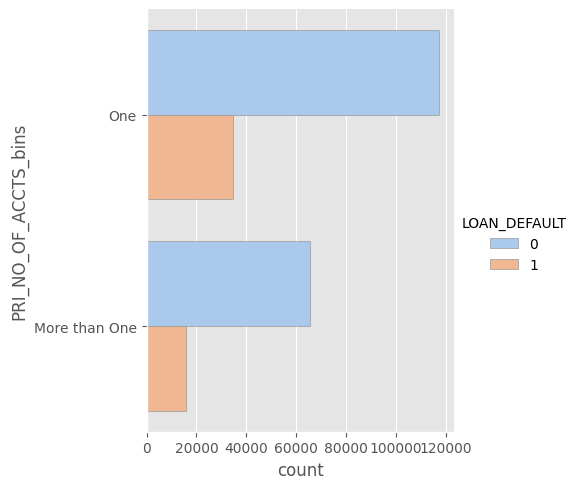

In [ ]:
plot_bar("PRI_NO_OF_ACCTS_bins")

PRI_OVERDUE_ACCTS: count of default accounts at the time of disbursement

count               233154.0
mean     0.15654889043293274
std       0.5487867498775106
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max                     25.0
Name: PRI_OVERDUE_ACCTS, dtype: object


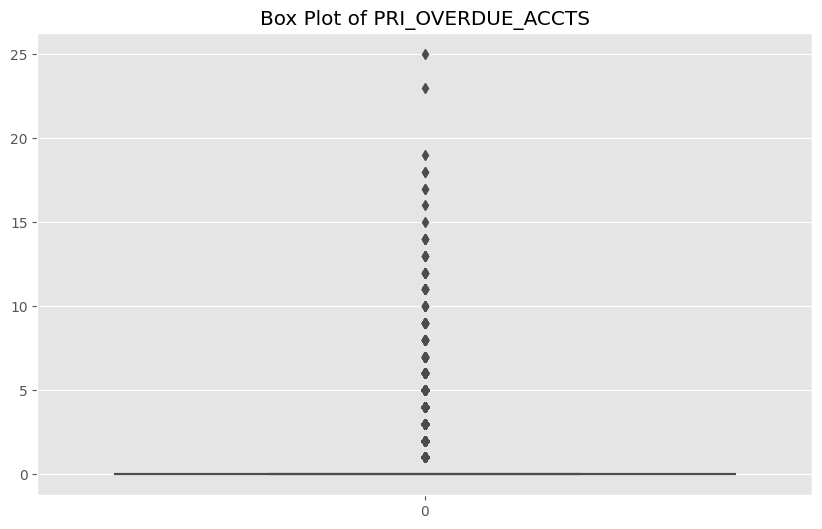

In [ ]:
print(train.PRI_OVERDUE_ACCTS.describe().astype(str))
plot_box("PRI_OVERDUE_ACCTS", "blue")

In [ ]:
outlier_data(train,"PRI_OVERDUE_ACCTS")

No. of observations in column:  233154
Statistics: Mean=0.157, Std dev=0.549
Identified outliers: 6305


In [ ]:
train["PRI_OVERDUE_ACCTS_new"]= train["PRI_OVERDUE_ACCTS"].apply(impute_outlier)
outlier_data(train,"PRI_OVERDUE_ACCTS_new")

No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=0.000
Identified outliers: 0


In [ ]:
bin_labels = ["None",'One (or more)']
cut_bins = [-1,0, 1000]

train['PRI_OVERDUE_ACCTS_bins'] = pd.cut(train['PRI_OVERDUE_ACCTS'],
                              bins=cut_bins,
                              labels=bin_labels)
train['PRI_OVERDUE_ACCTS_bins'].value_counts()

None             206879
One (or more)     26275
Name: PRI_OVERDUE_ACCTS_bins, dtype: int64

<Figure size 1000x5000 with 0 Axes>

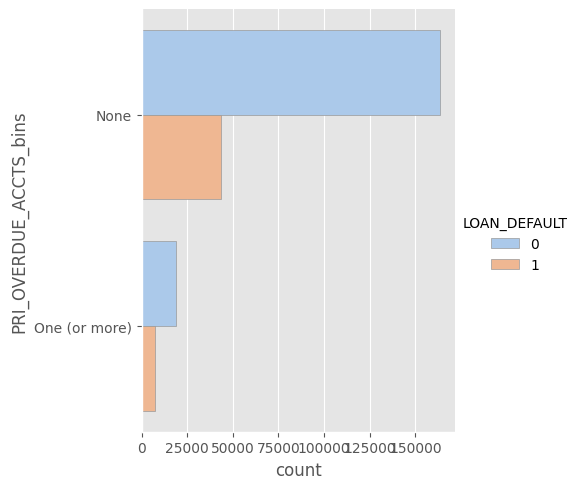

In [ ]:
plot_bar("PRI_OVERDUE_ACCTS_bins")

Let's look into data with lesser importance

MOBILENO_AVL_FLAG : if Mobile no. was shared by the customer then flagged as 1

AADHAR_FLAG : if aadhar was shared by the customer then flagged as 1

PAN_FLAG : if pan was shared by the customer then flagged as 1

VOTERID_FLAG : if voter was shared by the customer then flagged as 1

PASSPORT_FLAG : if DL was shared by the customer then flagged as 1

DRIVING_FLAG : if passport was shared by the customer then flagged as 1

<Figure size 640x480 with 0 Axes>

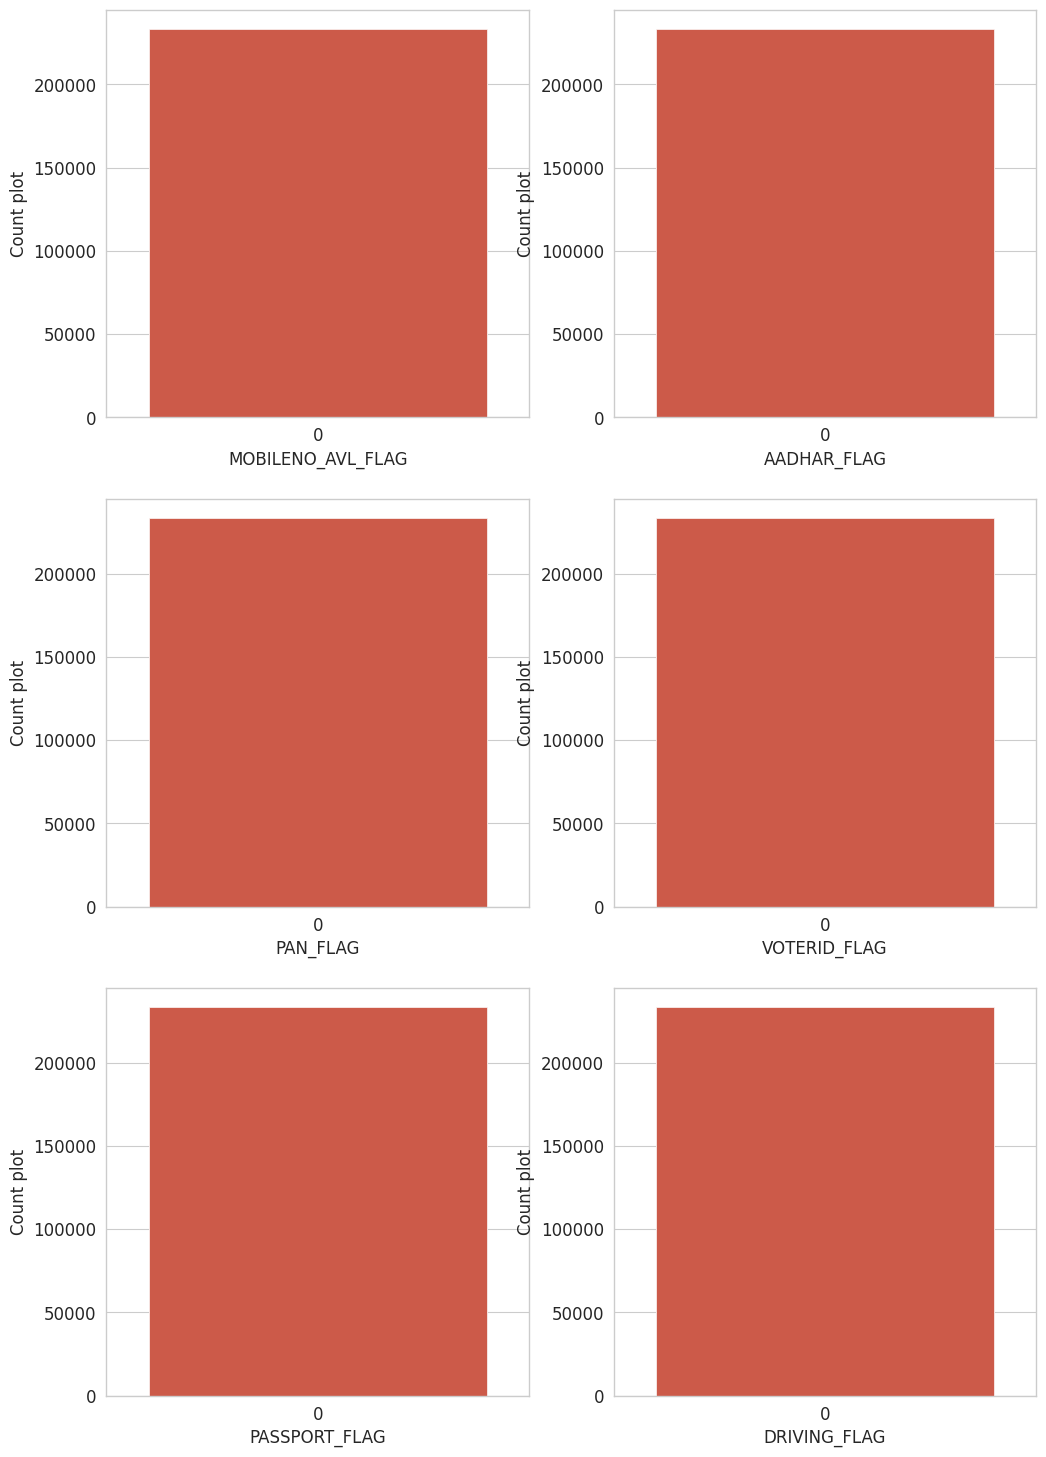

In [ ]:
var = ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']
plot_bar_comp(var,nrow=3)

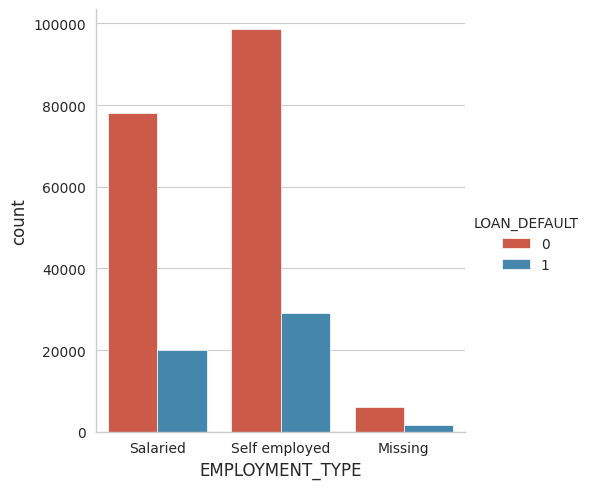

In [ ]:
# Employment Type
sns.catplot(data=train,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

Age is in days

In [ ]:
now = pd.Timestamp('now')
#train['DATE_OF_BIRTH'] = train['DATE_OF_BIRTH'].where(train['DATE_OF_BIRTH'] < now, train['DATE_OF_BIRTH'] -  np.timedelta64(100, 'Y'))
train['age'] = (now - train['DATE_OF_BIRTH'])

train['age']= train['age'].astype(str)
train[['age','age_waste']] = train['age'].str.split("days",expand=True)
train['age']= train['age'].astype(str).astype(int)
train= train.drop(columns= ['age_waste'])

print(train['age'].head())

0    14617
1    14040
2    14016
3    10966
4    16831
Name: age, dtype: int64


In [ ]:
train['disbursal_time'] = (now - train['DISBURSAL_DATE'])

train['disbursal_time']= train['disbursal_time'].astype(str)
train[['disbursal_time','disbursal_time_waste']] = train['disbursal_time'].str.split("days",expand=True)
train['disbursal_time']= train['disbursal_time'].astype(str).astype(int)
train= train.drop(columns= ['disbursal_time_waste'])

print(train['disbursal_time'].head())

0    1984
1    1930
2    1986
3    1900
4    1930
Name: disbursal_time, dtype: int64


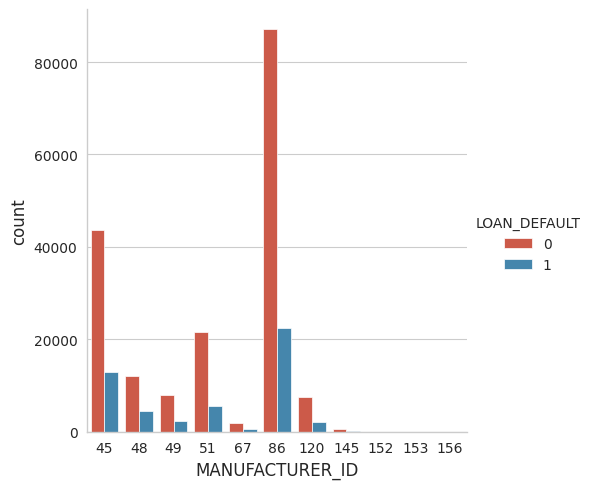

In [ ]:
# MANUFACTURER_ID
sns.catplot(data=train,kind='count',x='MANUFACTURER_ID',hue='LOAN_DEFAULT')

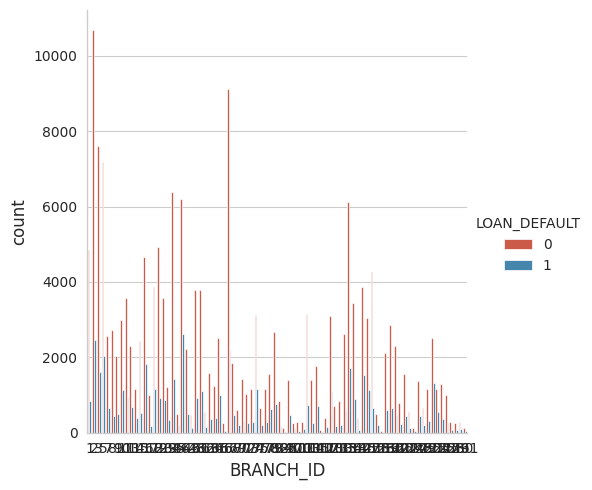

In [ ]:
sns.catplot(data=train,kind='count',x='BRANCH_ID',hue='LOAN_DEFAULT')

Let's see the new columns along with the less important continous variables

<Figure size 640x480 with 0 Axes>

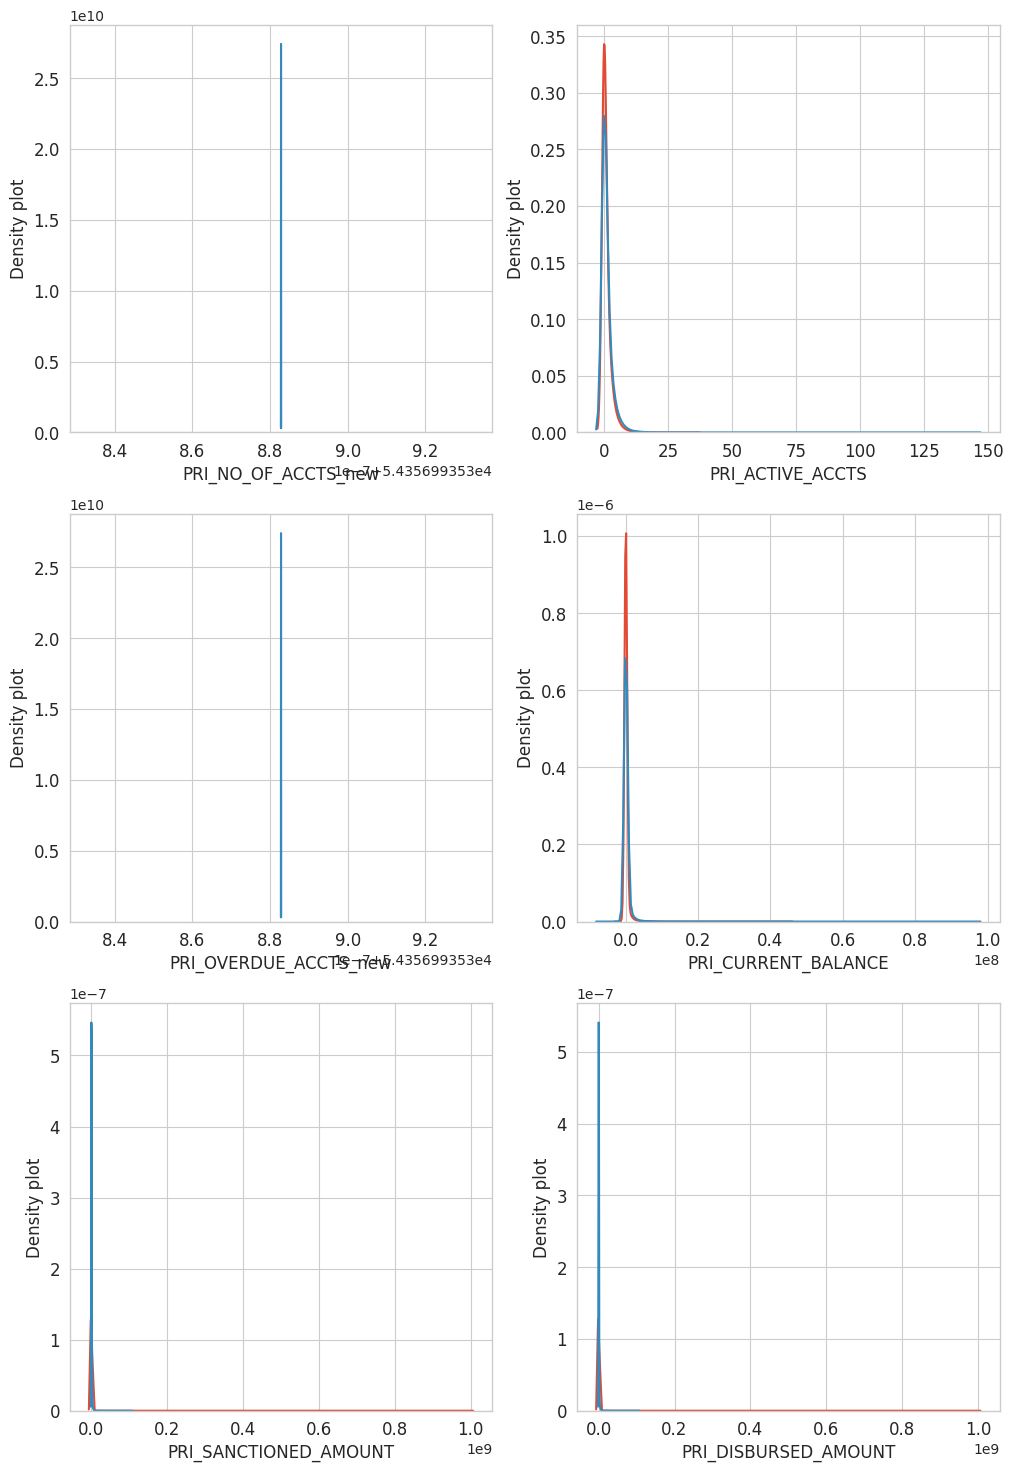

In [ ]:
var = ['PRI_NO_OF_ACCTS_new', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS_new', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

<Figure size 640x480 with 0 Axes>

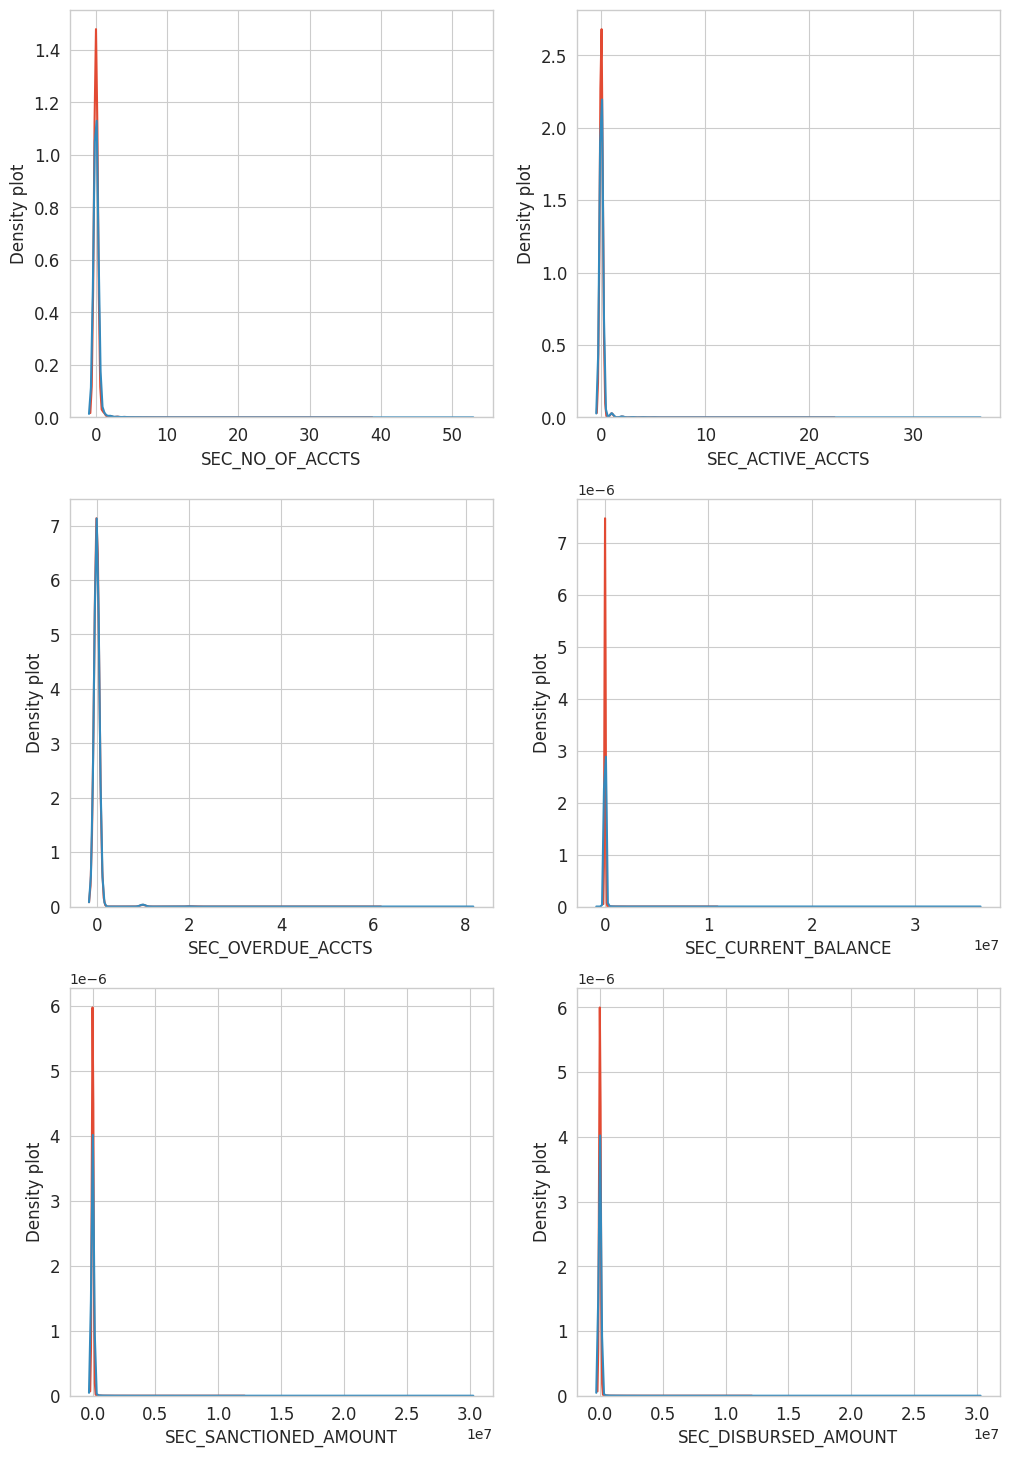

In [ ]:
var = ['SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT']
plot_distribution_comp(var,nrow=3)

**3.3 Feature Selection**

In [ ]:
#Useless features
#train = train.drop(['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS', 'DATE_OF_BIRTH', 'DISBURSAL_DATE', 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)
train = train.drop([ 'DATE_OF_BIRTH' , 'STATE_ID', 'EMPLOYEE_CODE_ID', 'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','BRANCH_ID'],axis=1)

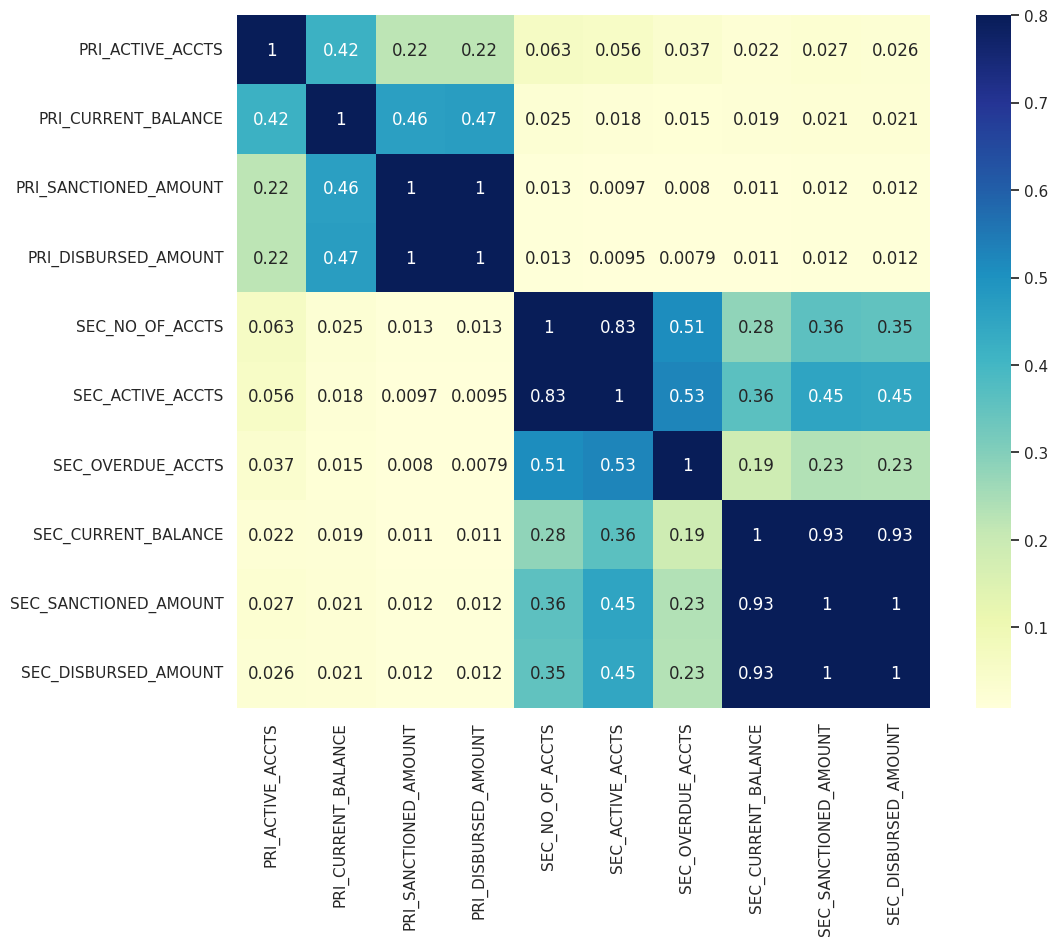

In [ ]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT',
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
              'SEC_DISBURSED_AMOUNT']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

Not highly correlated with anyone: 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT','SEC_OVERDUE_ACCTS'

'PRI_NO_OF_ACCTS_new', 'PRI_OVERDUE_ACCTS_new'are perfectly positively correlated and hence keeping one

'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS' are highly positively correlated, hence keeping one

'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' are highly positively correlated, hence keeping one

In [ ]:
# train = train.drop(['PRI_OVERDUE_ACCTS_new','SEC_ACTIVE_ACCTS','SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT' ],axis=1)

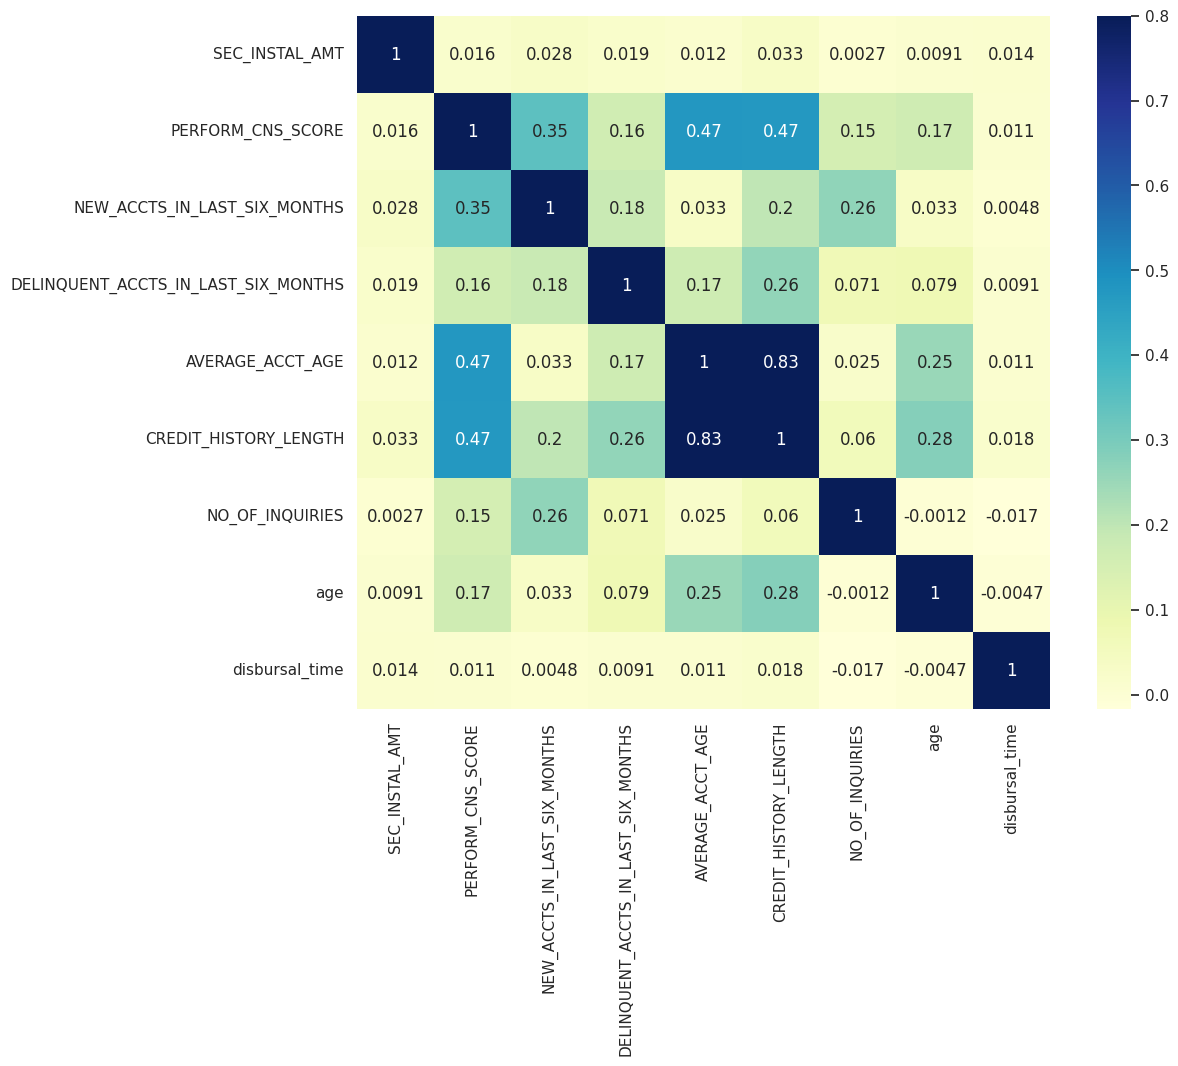

In [ ]:
#Highly Correlated
sns.set()

cols = train[['SEC_INSTAL_AMT', 'PERFORM_CNS_SCORE','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
              'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH'are highly positively correlated and hence keeping one

In [ ]:
#train = train.drop(['AVERAGE_ACCT_AGE' ],axis=1)

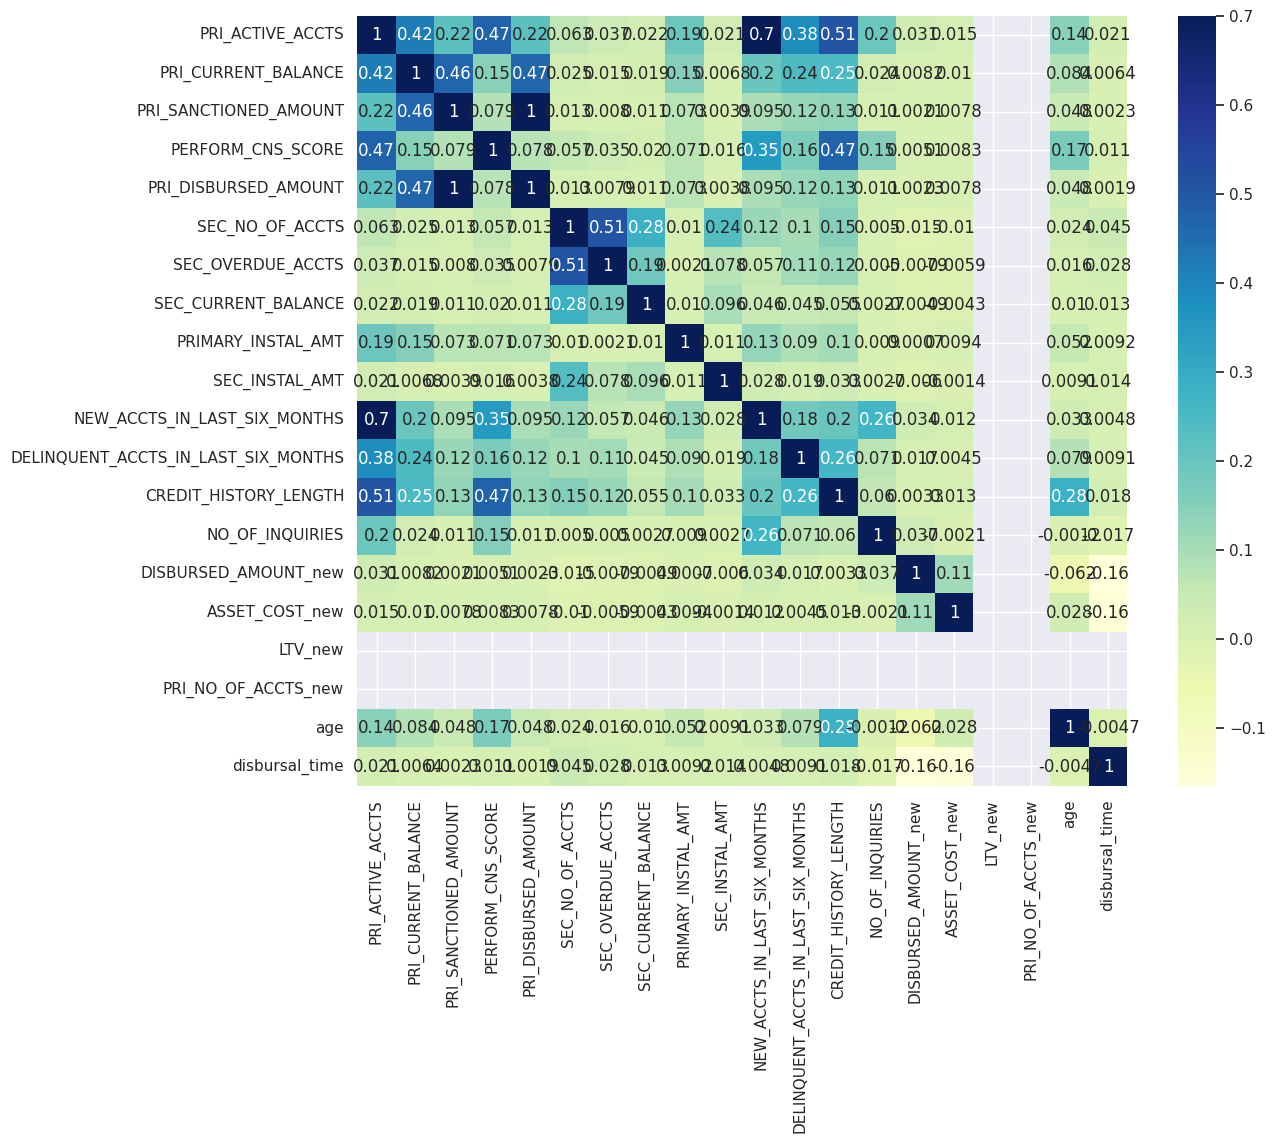

In [ ]:
#Highly Correlated
sns.set()

cols = train[['PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PERFORM_CNS_SCORE',
              'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
              'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
              'DISBURSED_AMOUNT_new','ASSET_COST_new','LTV_new','PRI_NO_OF_ACCTS_new','age', 'disbursal_time']]
corr = cols.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr, annot=True, vmax=.7, square=True,cmap = 'YlGnBu');

One out of 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT'

One out of 'LTV_new', 'PRI_NO_OF_ACCTS_new'

Eliminate 'NEW_ACCTS_IN_LAST_SIX_MONTHS'

In [ ]:
#train = train.drop(['PRI_SANCTIONED_AMOUNT','PRI_NO_OF_ACCTS_new','NEW_ACCTS_IN_LAST_SIX_MONTHS'],axis=1)

Preparing Datasets 1) Binned Variables 2) Continous variables

In [ ]:
train_con = train[['EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
                   'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE', 'PERFORM_CNS_SCORE_DESCRIPTION',
                   'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
                   'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                   'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
                   'LOAN_DEFAULT', 'DISBURSED_AMOUNT_new', 'ASSET_COST_new',
                   'LTV_new', 'age', 'disbursal_time']]

In [ ]:
train_bin = train [['UNIQUEID', 'EMPLOYMENT_TYPE', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
                    'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
                    'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE',
                    'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
                    'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
                    'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
                    'DISBURSED_AMOUNT_bins', 'ASSET_COST_bins', 'LTV_bins',
                    'PERFORM_CNS_SCORE_bins', 'PRI_NO_OF_ACCTS_bins', 'PRI_OVERDUE_ACCTS_bins', 'age', 'disbursal_time']]

In [ ]:
# Confusion Matrix

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Precision, Recall, F1 Score
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))


In [ ]:
# Precision-recall curve
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

In [ ]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

In [ ]:
#feature importance plot
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False)
    plt.figure(figsize = (15,8))
    plt.title('Features importance',fontsize=14)
    s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

3.5.1 Standardization of data

In [ ]:
scaler_data = StandardScaler()
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(train_con[col])),columns=[col])

    return df

In [ ]:
scaled_df = scaleColumns(train_con,['PERFORM_CNS_SCORE','PRI_ACTIVE_ACCTS', 'PRI_CURRENT_BALANCE',
                                 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_OVERDUE_ACCTS',
                                 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
                                 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
                                 'NO_OF_INQUIRIES', 'DISBURSED_AMOUNT_new',
                                 'ASSET_COST_new', 'LTV_new', 'age', 'disbursal_time'])

scaled_df.head()

,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time
0,Salaried,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-3.637979e-11,0.026250,1.880044
1,Self employed,1,1,0,0,0,0,0.911822,I-Medium Risk,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-3.637979e-11,-0.134554,-0.094516
2,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-3.637979e-11,-0.141243,1.953176
3,Self employed,1,1,0,0,0,0,0.045917,L-Very High Risk,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-3.637979e-11,-0.991244,-1.191493
4,Self employed,1,1,0,0,0,0,-0.855453,No Bureau History Available,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-3.637979e-11,0.643267,-0.094516


3.5.2 Dummy insertion

In [ ]:
train_dummy = pd.get_dummies(scaled_df, prefix_sep='_', drop_first=True)
train_dummy.head()

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-3.637979e-11,0.026250,1.880044,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-3.637979e-11,-0.134554,-0.094516,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-3.637979e-11,-0.141243,1.953176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-3.637979e-11,-0.991244,-1.191493,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-3.637979e-11,0.643267,-0.094516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
train_dummy

,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSED_AMOUNT_new,ASSET_COST_new,LTV_new,age,disbursal_time,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk,PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk,PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk,PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk,PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available
0,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.282591,-1.002057,-3.637979e-11,0.026250,1.880044,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0.911822,-0.020549,-0.146773,-0.070599,-0.094259,-0.065216,-0.031884,-0.073427,-0.020784,2.347632,0.236085,-0.292450,1,-0.589728,-0.257144,-3.637979e-11,-0.134554,-0.094516,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-0.041033,-0.693673,-3.637979e-11,-0.141243,1.953176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0.045917,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086376,-0.020784,-0.253566,-0.043819,1.122986,1,0.337856,-0.198489,-3.637979e-11,-0.991244,-1.191493,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,1.122986,1,-0.121552,-0.804108,-3.637979e-11,0.643267,-0.094516,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,1,0,0,1,0,0,1.316700,1.009586,0.238300,0.083301,-0.094259,-0.065216,-0.031884,-0.059600,-0.020784,-0.253566,0.795894,-0.292450,0,0.847812,-1.423271,-3.637979e-11,-0.440276,-1.191493,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233150,1,0,0,1,0,0,1.582678,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.076241,-0.020784,-0.253566,-0.358712,-0.292450,0,1.781658,-1.423271,-3.637979e-11,-0.475391,-1.081796,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
233151,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-1.811923,0.332743,-3.637979e-11,0.798218,-1.118362,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
233152,1,1,0,0,0,0,-0.855453,-0.535617,-0.176064,-0.091711,-0.094259,-0.065216,-0.031884,-0.086581,-0.020784,-0.253566,-0.568640,-0.292450,0,-1.742586,0.548819,-3.637979e-11,-1.015211,-0.204213,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#exportar data set
from google.colab import files
train_dummy.to_csv('/content/drive/MyDrive/Colab Notebooks/mydata.csv', index=False)